In [16]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
import spacy


import pandas as pd

from spacy.matcher import Matcher
from spacy.tokens import span 
import networkx as nx
from spacy import displacy
from collections import Counter

import matplotlib.pyplot as plt
from tqdm import tqdm

In [17]:
nlp = spacy.load("en_core_web_sm")

In [54]:
Dataset = pd.read_csv(r'C:\Users\Sangamithra\Desktop\Product_Description.csv')
Dataset.shape

(102, 2)

In [55]:
def get_entities(sent):
  ent1=""
  ent2=""
  pobj=""
  lis=[]
  sub_pass=""
  conjugation=""

  prefix =""
  modifier=""

  pre_tok_dep=""
  pre_tok_text=""

  for tok in nlp(sent):
    if tok.dep_ != "punct":
     
      if tok.dep_ == "compound":
        prefix= tok.text
        if pre_tok_dep == "compound":
          prefix= pre_tok_text + " "+ tok.text

      if tok.dep_.endswith("mod")==True:
        if tok.dep_!="advmod":
          modifier=tok.text
          if pre_tok_dep == "compound":
            modifier = pre_tok_text + " " + tok.text

      if tok.dep_.find("subj") == True:
        if tok.dep_=="nsubj":
          ent1= modifier + "" + prefix + " " + tok.text
          prefix=""
          modifier=""
          pre_tok_dep= ""
          pre_tok_dep= ""
        else:
          sub_pass= modifier + "" + prefix + " " + tok.text
          prefix=""
          modifier=""
          pre_tok_dep= ""
          pre_tok_dep= ""
         



      
      if tok.dep_.find("obj") == True:
        if tok.dep_=="dobj":
          ent2= modifier + "" + prefix + " " + tok.text
          prefix=""
          modifier=""
        if tok.dep_=="pobj":
          pobj= modifier+" "+ prefix + " "+ tok.text
          lis.append(pobj)
          prefix=""
          modifier=""
      
      if tok.dep_=="conj":
        conjugation= modifier + "" + prefix + " " + tok.text
        lis.append(conjugation)
        prefix=""
        modifier=""
        
        
      
      pre_tok_dep=tok.dep_
      pre_tok_text=tok.text

#  str1=""
#  for ele in lis:
#    str1+=ele
  
  if (len(lis))!=0:
    strlist = '\ '.join(lis)
    ent2= ent2+"\ " + strlist
  a= ''.join(sub_pass)
  ent1= ent1+" " + a
  return[ent1.strip(), ent2.strip()]

          
       



In [56]:
def get_relation(sent):

  doc=nlp(sent)

  matcher = Matcher(nlp.vocab)

  pattern =[{'DEP': 'ROOT'},{'DEP': 'prep','OP':"?"},{'DEP':'agent','OP':"?"},{'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)

  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)


In [57]:
Dataset['Product Description'].sample(5)

36           Take-out food can be ordered using Alexa. 
64    Alexa can update the users about their commute...
61    The feature to block alerts for messages and c...
37     Few years back Starbucks announced a private ...
15    The shop showcased the use of home automation ...
Name: Product Description, dtype: object

In [58]:
entitity_pairs =[]

for i in tqdm(Dataset['Product Description']):
  entitity_pairs.append(get_entities(i))

100%|██████████| 102/102 [00:00<00:00, 139.83it/s]


In [59]:
relation_list=[]
for i in tqdm(Dataset['Product Description']):
  relation_list.append(get_relation(i))

100%|██████████| 102/102 [00:00<00:00, 149.15it/s]


In [38]:
print(relation_list)

['is', 'is', 'is capable', 'provide', 'control several', 'are able', 'allow', 'has more', 'sound', 'included', 'inspired by', 'chose', 'helps', 'said', 'opened', 'showcased', 'sells', 'is available', 'used by', 'allows', 'is']


In [60]:
source=[i[0] for i in entitity_pairs]
target=[i[1] for i in entitity_pairs]
edge=[i[0] for i in relation_list]


KG_ld=pd.DataFrame({'source':source, 'target':target, 'edge':edge})

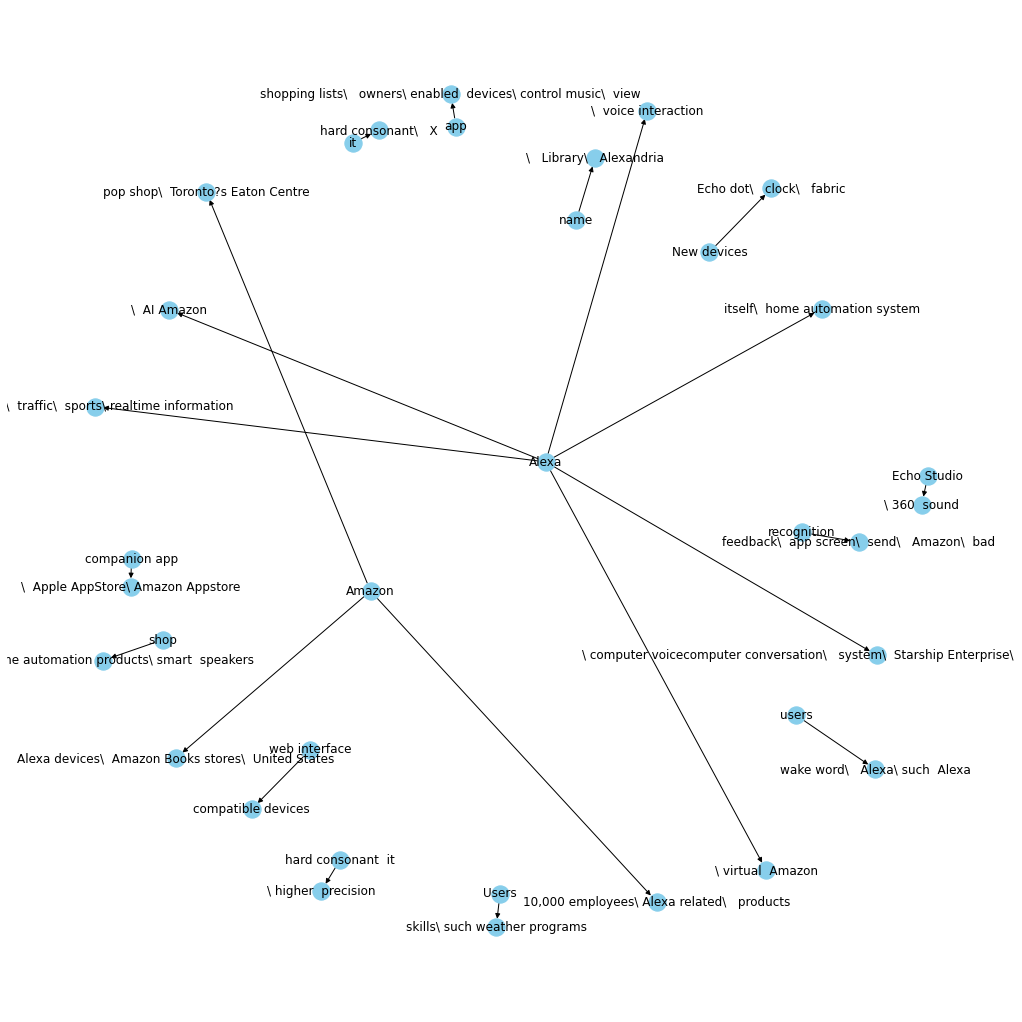

In [41]:
Graphld=nx.from_pandas_edgelist(KG_ld, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(14,14))

pos = nx.spring_layout(Graphld)
nx.draw(Graphld, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()


In [61]:
df = pd.DataFrame()
# Creating two columns
df['Source'] = [i[0] for i in entitity_pairs]
df['Target'] =[i[1] for i in entitity_pairs]
df['Edge'] = [i for i in relation_list]


# Converting to excel
df.to_csv('final.csv', index = False)

In [62]:
def get_ner(sent):
  for sentence in nlp(sent):
    doc = nlp(sent)
    return([(X.text, X.label_) for X in doc.ents])

In [63]:
ner_pairs=[]
for i in tqdm(Dataset['Product Description']):
  ner_pairs.append(get_ner(i))

100%|██████████| 102/102 [00:01<00:00, 82.96it/s]


In [64]:
print(ner_pairs)

[[('Alexa', 'ORG'), ('Amazon', 'ORG')], [('Alexa', 'ORG'), ('AI', 'ORG'), ('Amazon', 'ORG')], [('Alexa', 'ORG')], [('Alexa', 'ORG')], [('Alexa', 'ORG')], [('Alexa', 'ORG')], [('Alexa', 'ORG'), ('Alexa', 'ORG')], [('Amazon', 'ORG'), ('more than 10,000', 'CARDINAL'), ('Alexa', 'ORG')], [('Echo Studio', 'PERSON'), ('first', 'ORDINAL'), ('360', 'CARDINAL'), ('Dolby', 'FAC')], [], [('Alexa', 'ORG'), ('the Starship Enterprise', 'WORK_OF_ART')], [('Amazon', 'ORG'), ('Alexa', 'ORG')], [], [('Amazon', 'ORG'), ('the Library of Alexandria', 'ORG')], [('Amazon', 'ORG'), ('first', 'ORDINAL'), ('Alexa', 'ORG'), ('Eaton Centre', 'FAC')], [('Amazon', 'ORG')], [('Amazon', 'ORG'), ('Alexa', 'ORG'), ('Amazon Books', 'ORG'), ('the United States', 'GPE')], [('Google Play', 'PERSON'), ('Amazon Appstore', 'ORG')], [('Alexa', 'ORG')], [('Amazon', 'ORG')], [], [('Alexa', 'ORG')], [('Alexa', 'ORG')], [('Alexa', 'ORG')], [('Alexa', 'ORG')], [('WolframAlpha', 'ORG'), ('AccuWeather', 'ORG'), ('Yelp, Wikipedia', 'O

In [65]:
entities={'Alexa': 'ORG',
          'Amazon': 'ORG',
          'AI':'ORG',
          'more than 10,000':'CARDINAL',
          'Echo Studio': 'PERSON',
          'first': 'ORDINAL',
          '360': 'CARDINAL',
          'Dolby':'FAC',
          'the Starship Enterprise': 'ORG',
          'first': 'ORDINAL',
          'Eaton Centre':'FAC',
          'Amazon Books': 'ORG',
          'the United States': 'GPE',
          'Google Play':'PERSON',
          'Amazon Appstore': 'ORG',
          'WolframAlpha':'ORG', 
          'AccuWeather': 'ORG', 
          'Yelp, Wikipedia': 'ORG', 
          'Amazon Music': 'ORG', 
          'Apple Music': 'ORG',
          'third': 'ORDINAL', 
          'over 90,000': 'CARDINAL' ,
          'AmazonBasics': 'ORG',
          'Starbucks': 'ORG',
          '20': 'CARDINAL',
          'US': 'GPE',
          'Amazon Key': 'ORG',
          'over two million': 'CARDINAL',
          'Amazon Music Unlimited': 'ORG', 
          'millions': 'CARDINAL', 
          'iTunes': 'NORP',
          'Up to 250': 'CARDINAL',
          'Sports Update': 'ORG',
          'one': 'CARDINAL', 
          'Echo': 'LOC',
          'more than one': 'CARDINAL',
          'Disturb': 'PERSON',
          'Alexa Skills Kit': 'PERSON', 
          'Blueprints': 'ORG', 
          'Alexa Skill Store': 'PRODUCT',
          'the Alexa Voice Service': 'ORG', 
          'AVS': 'ORG',
          'ASR': 'ORG',
          'NLU': 'ORG',
          '0.99': 'MONEY', 
          'Spanish': 'LANGUAGE',
          'Amazon Lex': 'ORG',
          'Facebook Messenger': 'ORG', 
         }

In [50]:
pip install neo4j

In [51]:
pip install py2neo

Note: you may need to restart the kernel to use updated packages.


In [52]:
import csv
from py2neo import Graph
from py2neo import Node, Relationship
import pickle

In [69]:
# Connect to Neo4j using corresponding <port:7687> and <password>
graph = Graph("bolt://localhost:7687", auth=("neo4j", "12345"))
# graph.delete_all()

for index, row in df.iterrows():
    sub, obj ,rel = row
    print(sub, obj , rel)
    
    sub_node = graph.nodes.match(entities.get(sub, "Object"), name=sub).first()
    obj_node = graph.nodes.match("Object", name=obj).first()
    if not sub_node:
        sub_node = Node(entities.get(sub, "Object"),name = sub)
    if not obj_node:
        obj_node = Node(entities.get(obj, "Object"),name = obj)
        
    relation = Relationship.type(rel)    
    graph.merge(relation(sub_node, obj_node), entities.get(sub, "Object"), "name" )

Alexa \ virtual  Amazon is
Alexa \  AI Amazon is
Alexa \  voice interaction is capable
Alexa weather\  traffic\  sports\ realtime information provide
Alexa itself\  home automation system control several
Users skills\ such weather programs are able
users wake word\   Alexa\ such  Alexa allow
Amazon 10,000 employees\ Alexa related\   products has more
Echo Studio \ 360  sound sound
New devices Echo dot\   clock\   fabric included
Alexa \ computer voicecomputer conversation\   system\  Starship Enterprise\  fiction TV series\  movies inspired by
it hard consonant\   X chose
hard consonant  it \ higher  precision helps
name \   Library\   Alexandria said
Amazon pop shop\  Toronto?s Eaton Centre opened
shop use\  home automation products\ smart  speakers showcased
Amazon Alexa devices\  Amazon Books stores\  United States sells
companion app \  Apple AppStore\ Amazon Appstore is available
app shopping lists\   owners\ enabled  devices\ control music\  view used by
recognition feedback\  ap